In [ ]:
#Picked models with the best scores to gridsearch and improve scores

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import LinearSVR
from warnings import filterwarnings

In [2]:
all_drugs = pd.read_csv('./data/all_drugs.csv')
all_drugs.head()

C:\Users\12155\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,key_0,NDC Description,NDC,NADAC_Per_Unit,Effective_Date,Pricing_Unit,Pharmacy_Type_Indicator,OTC,Explanation_Code,Classification_for_Rate_Setting,...,Appl_No,Product_No,TE_Code,Approval_Date,RLD,RS,Type,Applicant_Full_Name,dosage_form,route
0,OLANZAPINE 10MG ORAL,OLANZAPINE 10MG TABLET,904637661,0.2202,12/23/2015,EA,C/I,N,1,G,...,204320,2,NaN,"May 30, 2017",No,No,DISCN,AJANTA PHARMA LTD,"TABLET, ORALLY DISINTEGRATING",ORAL
1,OLANZAPINE 10MG ORAL,OLANZAPINE 10MG TABLET,904637661,0.2202,12/23/2015,EA,C/I,N,1,G,...,91265,2,AB,"Oct 24, 2011",No,No,RX,APOTEX INC,"TABLET, ORALLY DISINTEGRATING",ORAL
2,OLANZAPINE 10MG ORAL,OLANZAPINE 10MG TABLET,904637661,0.2202,12/23/2015,EA,C/I,N,1,G,...,203708,2,AB,"May 15, 2014",No,No,RX,AUROBINDO PHARMA LTD,"TABLET, ORALLY DISINTEGRATING",ORAL
3,OLANZAPINE 10MG ORAL,OLANZAPINE 10MG TABLET,904637661,0.2202,12/23/2015,EA,C/I,N,1,G,...,77243,2,AB,"Jan 30, 2012",No,No,RX,BARR LABORATORIES INC,"TABLET, ORALLY DISINTEGRATING",ORAL
4,OLANZAPINE 10MG ORAL,OLANZAPINE 10MG TABLET,904637661,0.2202,12/23/2015,EA,C/I,N,1,G,...,76534,2,AB,"Oct 24, 2011",No,No,RX,DR REDDYS LABORATORIES LTD,"TABLET, ORALLY DISINTEGRATING",ORAL


In [3]:
all_drugs.sort_values(['NADAC_Per_Unit'], ascending=False)

,key_0,NDC Description,NDC,NADAC_Per_Unit,Effective_Date,Pricing_Unit,Pharmacy_Type_Indicator,OTC,Explanation_Code,Classification_for_Rate_Setting,...,Appl_No,Product_No,TE_Code,Approval_Date,RLD,RS,Type,Applicant_Full_Name,dosage_form,route
125625,EPCLUSA 400MG;100MG ORAL,EPCLUSA 400MG-100MG TABLET,61958220101,869.45583,12/13/2017,EA,C/I,N,4,B,...,208341,1,NaN,"Jun 28, 2016",Yes,Yes,RX,GILEAD SCIENCES INC,TABLET,ORAL
119909,MIGRANAL 0.5MG/SPRAY NASAL,MIGRANAL NASAL SPRAY,187024503,346.90426,11/21/2014,ML,C/I,N,"4, 5",B,...,20148,1,AB,"Dec 8, 1997",Yes,Yes,RX,BAUSCH HEALTH US LLC,"SPRAY, METERED",NASAL
111643,TEMOZOLOMIDE 180MG ORAL,TEMOZOLOMIDE 180MG CAPSULE,93763941,313.40788,01/22/2014,EA,C/I,N,4,G,...,207658,5,AB,"Apr 26, 2017",No,No,RX,DEVA HOLDING AS,CAPSULE,ORAL
111591,TEMOZOLOMIDE 180MG ORAL,TEMOZOLOMIDE 180MG CAPSULE,93763957,313.40788,01/22/2014,EA,C/I,N,4,G,...,207658,5,AB,"Apr 26, 2017",No,No,RX,DEVA HOLDING AS,CAPSULE,ORAL
111599,TEMOZOLOMIDE 180MG ORAL,TEMOZOLOMIDE 180MG CAPSULE,781269544,313.40788,01/22/2014,EA,C/I,N,"4, 6",G,...,203691,5,AB,"May 8, 2015",No,No,RX,AMNEAL PHARMACEUTICALS,CAPSULE,ORAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115625,STERILE WATER 100% IRRIGATION,STERILE WATER FOR IRRIGATION,409797307,0.00122,12/18/2013,ML,C/I,N,"1, 5",G,...,17428,1,AT,"Approved Prior to Jan 1, 1982",Yes,No,RX,BAXTER HEALTHCARE CORP,LIQUID,IRRIGATION
115624,STERILE WATER 100% IRRIGATION,STERILE WATER FOR IRRIGATION,409797308,0.00122,12/18/2013,ML,C/I,N,"1, 5",G,...,17428,1,AT,"Approved Prior to Jan 1, 1982",Yes,No,RX,BAXTER HEALTHCARE CORP,LIQUID,IRRIGATION
115622,STERILE WATER 100% IRRIGATION,STERILE WATER FOR IRRIGATION,338000404,0.00122,12/18/2013,ML,C/I,N,"1, 5, 6",G,...,17428,1,AT,"Approved Prior to Jan 1, 1982",Yes,No,RX,BAXTER HEALTHCARE CORP,LIQUID,IRRIGATION
115621,STERILE WATER 100% IRRIGATION,STERILE WATER FOR IRRIGATION,409713909,0.00122,12/18/2013,ML,C/I,N,"1, 5",G,...,17428,1,AT,"Approved Prior to Jan 1, 1982",Yes,No,RX,BAXTER HEALTHCARE CORP,LIQUID,IRRIGATION


In [4]:
all_drugs.describe()

,NDC,NADAC_Per_Unit,Corresponding_Generic_Drug_NADAC_Per_Unit,Unnamed: 0,Appl_No,Product_No
count,1.269770e+05,126977.000000,95.000000,126977.000000,126977.000000,126977.000000
mean,4.037012e+10,1.532781,2.961639,28378.750884,113971.455342,2.013727
std,2.749959e+10,12.371292,5.117169,6227.059829,59996.236252,1.215777
min,2.445301e+06,0.000700,0.030880,14.000000,7073.000000,1.000000
25%,1.070201e+10,0.049040,0.207530,25567.000000,76110.000000,1.000000
50%,5.107902e+10,0.127610,1.193610,29439.000000,78708.000000,2.000000
75%,6.586201e+10,0.356400,3.297330,31352.000000,202168.000000,3.000000
max,7.643901e+10,869.455830,30.122190,38828.000000,213967.000000,6.000000


In [5]:
iqr = 0.365 - 0.049
iqr *1.5
#The max 869.46 (epclusa - a drug for hepatitis c) is more than 1.5 times the IQR and I will be removing that outlier

0.474

In [6]:
all_drugs.drop(index=125625, inplace=True)

In [7]:
#drop some columns I dont need and get dummies
all_drugs.drop(columns=['Corresponding_Generic_Drug_Effective_Date', 'Unnamed: 0', 'DF;Route'], inplace=True)
features =  all_drugs[['NDC Description','Pharmacy_Type_Indicator', 'Classification_for_Rate_Setting', 'dosage_form', 'route',
           'Ingredient', 'Type']].copy()
feature_dummies = pd.get_dummies(features, columns = ['NDC Description','Pharmacy_Type_Indicator', 'Classification_for_Rate_Setting', 'dosage_form', 'route',
           'Ingredient', 'Type'], drop_first=True)
X = feature_dummies
y = all_drugs['NADAC_Per_Unit']

In [8]:
#scale data
sc = StandardScaler()
X_sc = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_sc, y, random_state=17)

In [9]:
#Grid searches - knn, adaboost, svm
knn = KNeighborsRegressor()

params = {
    'n_neighbors': [5,7,9],
    'weights': ['uniform', 'distance' ]}

gs = GridSearchCV(knn, params, cv = 5, verbose=1)
gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 533.1min finished


0.9021757577582445
{'n_neighbors': 9, 'weights': 'distance'}


In [10]:
ada = AdaBoostRegressor()

ada_params = {'n_estimators' : [100,150,200],
         'loss': ['linear', 'square', 'exponential']}

gs_ada = GridSearchCV(ada, ada_params, cv=5, verbose = 1)
gs_ada.fit(X_train, y_train)
print(gs_ada.best_score_)
print(gs_ada.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed: 232.1min finished


-7.9490539016646835
{'loss': 'square', 'n_estimators': 150}


In [14]:
svr = LinearSVR()

svr_params = {
    'C' :np.linspace(0,1,20)}

gs_svr = GridSearchCV(svr, svr_params, cv=5, verbose=1, n_jobs = 2)
gs_svr.fit(X_train, y_train)
print(gs_svr.best_score_)
print(gs_svr.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed: 99.7min
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed: 211.1min finished


0.8927500443625764
{'C': 0.10526315789473684}


C:\Users\12155\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [15]:
svr = LinearSVR(C = 0.10526315789473684)
svr.fit(X_train, y_train)

C:\Users\12155\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=0.10526315789473684, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [16]:
print(svr.score(X_train, y_train))
print(svr.score(X_test, y_test))

0.9122485111604852
0.8928513939457241


In [19]:
#svm did the best, so I will graph preds vs actual for this one 
#also did knn in a separate notebook while svm gridsearch was still running
from sklearn import metrics
metrics.mean_squared_error(y_test, svr.predict(X_test), squared=False)

4.253069267071219

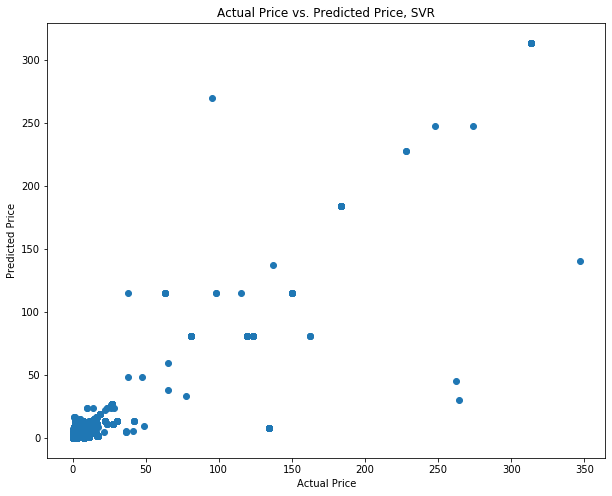

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(y_test, svr.predict(X_test))
plt.title('Actual Price vs. Predicted Price, SVR')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price');